In [3]:
%pip install natasha
%pip install nltk
import json
import natasha
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
nltk.download('stopwords')

Defaulting to user installation because normal site-packages is not writeable
  Using cached natasha-1.6.0-py3-none-any.whl (34.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 KB 174.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 815.4 kB/s eta 0:00:00:--:--
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 1.8 MB/s eta 0:00:0000:0100:010m
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=1e44978a6b61e1458867e1a68eb681619683fd1fec49818ef27396817d4298f3
  Stored in directory: /home/nika/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26119 sha256=0be10a306f56188c59c5640719908e70cdd5b2edaf0dc0255ca06ef04a94b6b3
  Stored in directory: /home/nika/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3f

[nltk_data] Downloading package stopwords to /home/nika/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
with open('articles.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Получаем список заголовков и текстов
titles = [article["title"] for article in data]
texts = [article["body"] for article in data]

# Создаем словарь с заголовками и текстами
articles_dict = dict(zip(titles, texts))

In [13]:
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

In [14]:
from ipymarkup import show_dep_ascii_markup as show_markup
articles = list(articles_dict.values())
article = articles[19]


doc = Doc(str(article))
doc.segment(segmenter)
doc.parse_syntax(syntax_parser)
doc.tag_morph(morph_tagger)

for sentence in doc.sents: # получаем предложения
  sentence.syntax.print()

    ┌────────────────────────► [               punct
    │ ┌──────────────────────► '               punct
┌─┌─│ │ ┌──►┌─────────────┌─── Фото            parataxis
│ │ │ │ │   │             │ ┌► :               punct
│ │ │ │ │ ┌─│ ┌─┌─┌───┌─┌─└►└─ Moritz          appos
│ │ │ │ │ │ │ │ │ │   │ │ └──► Wolf            flat:foreign
│ │ │ │ │ │ │ │ │ │ ┌►│ │      /               punct
│ │ │ │ │ │ │ │ │ │ │ │ └────► imagebroker     flat:foreign
│ │ │ │ │ │ │ │ │ │ │ │   ┌──► .               punct
│ │ │ │ │ │ │ │ │ │ │ └──►│    com             flat:foreign
│ │ │ │ │ │ │ │ │ │ │     │ ┌► /               punct
│ │ │ │ │ │ │ │ │ └►└───┌─└─└─ Globallookpress flat:foreign
│ │ │ │ │ │ │ │ │       │ └──► .               punct
│ │ │ │ │ │ │ │ └──────►│      com             flat:foreign
│ │ │ │ │ │ │ │         └────► '               punct
│ │ │ │ │ │ │ │           ┌──► ,               punct
│ │ │ │ │ │ │ │           │ ┌► '               punct
│ │ │ │ │ │ │ └────────►┌─└─└─ Сервис          conj
│ │ │ │ 

In [15]:
# Получение токенов
for sentence in doc.sents:
  for token in sentence.tokens:
    print(token)

# Заменяем слова на их леммы (начальные формы слова)
for sentence in doc.sents:
  for token in sentence.tokens:
    token.lemmatize(morph_vocab)
  lemmas = {_.text: _.lemma for _ in sentence.tokens}
  print(lemmas.items())

DocToken(stop=1, text='[', id='1_1', head_id='1_34', rel='punct', pos='PUNCT')
DocToken(start=1, stop=2, text="'", id='1_2', head_id='1_34', rel='punct', pos='PUNCT')
DocToken(start=2, stop=6, text='Фото', id='1_3', head_id='1_34', rel='parataxis', pos='NOUN', feats=<Inan,Nom,Neut,Sing>)
DocToken(start=6, stop=7, text=':', id='1_4', head_id='1_5', rel='punct', pos='PUNCT')
DocToken(start=8, stop=14, text='Moritz', id='1_5', head_id='1_3', rel='appos', pos='X', feats=<Yes>)
DocToken(start=15, stop=19, text='Wolf', id='1_6', head_id='1_5', rel='flat:foreign', pos='X', feats=<Yes>)
DocToken(start=20, stop=21, text='/', id='1_7', head_id='1_12', rel='punct', pos='PUNCT')
DocToken(start=22, stop=33, text='imagebroker', id='1_8', head_id='1_5', rel='flat:foreign', pos='X', feats=<Yes>)
DocToken(start=33, stop=34, text='.', id='1_9', head_id='1_12', rel='punct', pos='PUNCT')
DocToken(start=34, stop=37, text='com', id='1_10', head_id='1_5', rel='flat:foreign', pos='X', feats=<Yes>)
DocToken(st

In [16]:
# Записываем в словарь подлежащее : сказуемое
pairs = {}
for sentence in doc.sents:
    nsubj = root = ''
    for token in sentence.tokens:
        token.lemmatize(morph_vocab)
        if token.rel in {"nsubj", "root"}:
            if token.rel == "nsubj":
                nsubj = token.lemma
            elif token.rel == "root":
                root = token.lemma
            if nsubj and root:
                pairs[nsubj] = root

all_pairs = []
for article in articles:
  doc = Doc(str(article))
  doc.segment(segmenter)
  doc.parse_syntax(syntax_parser)
  doc.tag_morph(morph_tagger)
  for sentence in doc.sents:
    nsubj = root = ''
    for token in sentence.tokens:
      token.lemmatize(morph_vocab)
      if token.rel == "nsubj":
        nsubj = token.lemma
      if token.rel == 'root':
        root = token.lemma
      if nsubj and root:
        all_pairs.append((nsubj, root))

print(all_pairs)
all_pairs_count = Counter(all_pairs)
all_pairs_count.most_common(20)

[('половина', 'считать'), ('половина', 'считать'), ('половина', 'считать'), ('ситуация', 'считать'), ('ситуация', 'считать'), ('ситуация', 'считать'), ('ситуация', 'считать'), ('ситуация', 'считать'), ('ситуация', 'считать'), ('ситуация', 'считать'), ('ситуация', 'считать'), ('ситуация', 'считать'), ('ситуация', 'считать'), ('ситуация', 'считать'), ('ситуация', 'считать'), ('ситуация', 'считать'), ('ситуация', 'считать'), ('ситуация', 'считать'), ('опрос', 'свидетельствовать'), ('опрос', 'свидетельствовать'), ('опрос', 'свидетельствовать'), ('опрос', 'свидетельствовать'), ('опрос', 'свидетельствовать'), ('опрос', 'свидетельствовать'), ('опрос', 'свидетельствовать'), ('опрос', 'свидетельствовать'), ('опрос', 'свидетельствовать'), ('опрос', 'свидетельствовать'), ('опрос', 'свидетельствовать'), ('опрос', 'свидетельствовать'), ('страна', 'свидетельствовать'), ('страна', 'свидетельствовать'), ('страна', 'свидетельствовать'), ('страна', 'свидетельствовать'), ('страна', 'свидетельствовать'), 

[(('процент', 'заявить'), 46),
 (('президент', 'отмечаться'), 35),
 (('процент', 'считать'), 32),
 (('покупатель', 'смочь'), 31),
 (('стоимость', 'он'), 31),
 (('оно', 'невозможный'), 28),
 (('который', 'итог'), 28),
 (('депутат', 'направить'), 25),
 (('певица', 'подвергнуться'), 25),
 (('соединение', 'встречаться'), 25),
 (('президент', 'стать'), 25),
 (('страна', 'необходимый'), 25),
 (('диагноз', 'думать'), 24),
 (('он', 'рассказать'), 24),
 (('президент', 'подчеркнуть'), 24),
 (('фермер', 'выступать'), 24),
 (('компания', 'заверить'), 23),
 (('конференция', 'добавить'), 23),
 (('автомобиль', 'пропускать'), 23),
 (('она', 'направить'), 23)]

In [17]:
# Наиболее частовстречающиеся слова, исключая стоп слова, знаки пунктуации и числа, а также англ. n (знак переноса строки)
import string
filtered = []
punctuation = set(string.punctuation + '«»—' + string.digits + 'n')
stop_words = set(stopwords.words('russian'))
for article in articles:
  doc = Doc(str(article))
  doc.segment(segmenter)
  doc.parse_syntax(syntax_parser)
  doc.tag_morph(morph_tagger)
  for sentence in doc.sents:
    for token in sentence.tokens:
      token.lemmatize(morph_vocab)
      if token.lemma not in punctuation and token.lemma not in stop_words:
        filtered.append(token.lemma)

filtered_count = Counter(filtered)
filtered_count.most_common(20)

[('xa', 51),
 ('россия', 25),
 ('который', 23),
 ('это', 22),
 ('украина', 18),
 ('фото', 17),
 ('страна', 17),
 ('ранее', 14),
 ('президент', 14),
 ('процент', 12),
 ('заявить', 12),
 ('стать', 12),
 ('свой', 12),
 ('весь', 11),
 ('sprint', 10),
 ('год', 9),
 ('слово', 8),
 ('песков', 8),
 ('время', 7),
 ('очень', 7)]

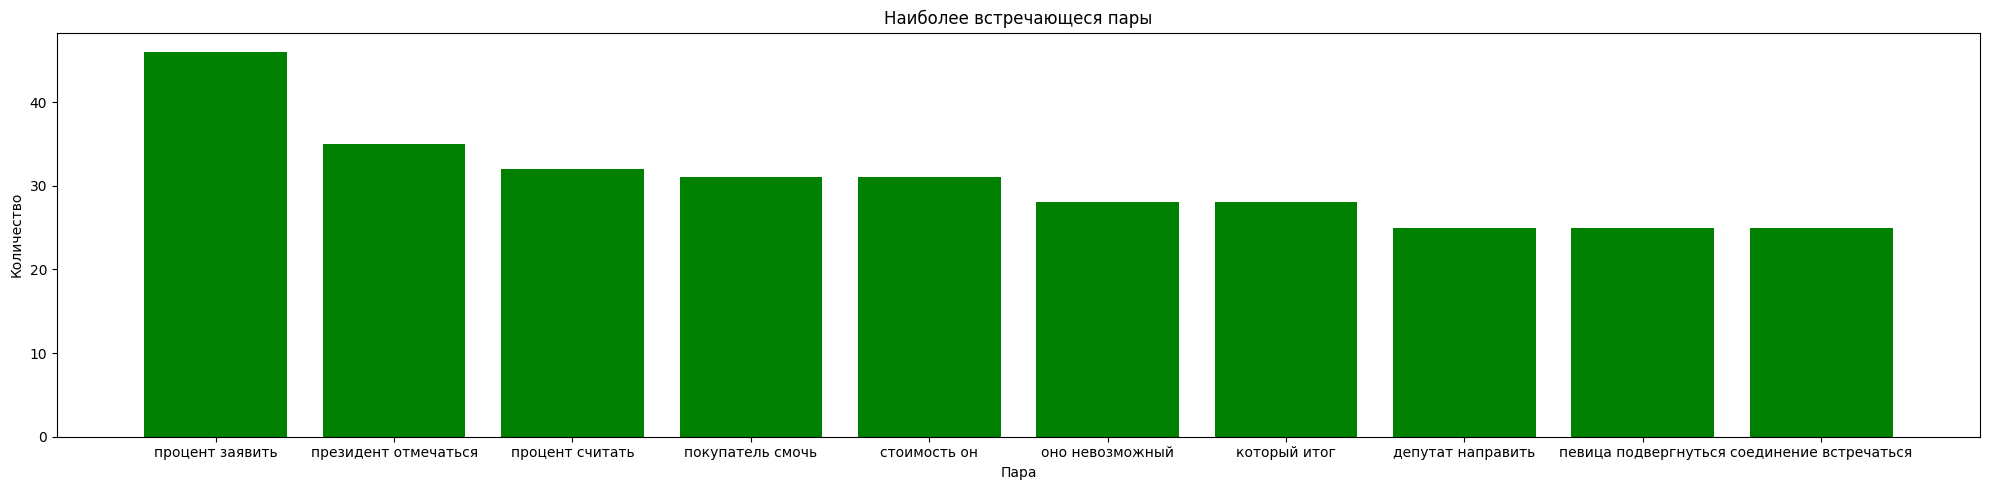

In [18]:
pairs = [pair[0][0] + ' ' + pair[0][1] for pair in all_pairs_count.most_common(10)]
count = [pair[1] for pair in all_pairs_count.most_common(10)]

plt.figure(figsize=(20, 5))
plt.bar(pairs, count, color = 'green')
plt.title("Наиболее встречающеся пары")
plt.ylabel("Количество")
plt.xlabel("Пара")
plt.tight_layout()
plt.show()

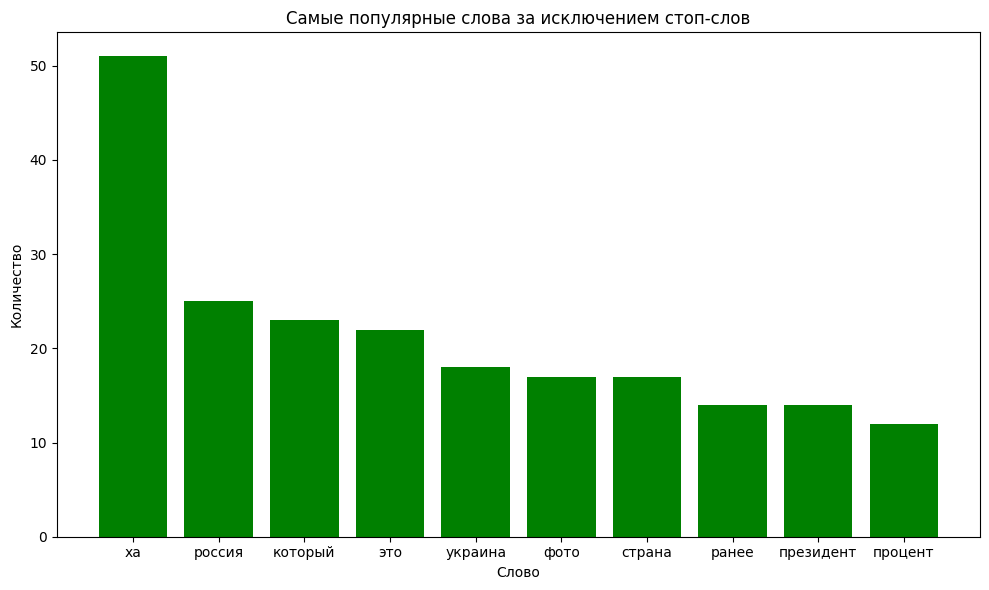

In [19]:
words = [pair[0] for pair in filtered_count.most_common(10)]
count = [pair[1] for pair in filtered_count.most_common(10)]

plt.figure(figsize=(10, 6))
plt.bar(words, count, color = 'green')
plt.title("Самые популярные слова за исключением стоп-слов")
plt.ylabel("Количество")
plt.xlabel("Слово")
plt.tight_layout()
plt.show()